In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Chicago_Crime_Detective.csv


Reading the data

In [2]:
data = pd.read_csv("/kaggle/input/Chicago_Crime_Detective.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012
...,...,...,...,...,...,...,...,...,...,...
191636,191636,1310068,1/1/01 0:05,STREET,False,False,1123,NaN,NaN,2001
191637,191637,1313404,1/1/01 0:01,STREET,False,False,2023,NaN,NaN,2001
191638,191638,1313442,1/1/01 0:01,STREET,False,False,911,NaN,NaN,2001
191639,191639,1563324,1/1/01 0:01,STREET,False,False,1712,NaN,NaN,2001


Parsing the date: Converting date from string to date type

In [4]:
import dateutil
data['Date'] = data['Date'].apply(dateutil.parser.parse, dayfirst = True)

Checking for missing values

In [5]:
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


In [6]:
data.isnull().any()

Unnamed: 0             False
ID                     False
Date                   False
LocationDescription    False
Arrest                 False
Domestic               False
Beat                   False
District                True
CommunityArea           True
Year                   False
dtype: bool

Removing all the null values

In [7]:
#data.dropna(inplace = True)

Rechecking if there's still any null (LOL)

In [8]:
data.isnull().any()

Unnamed: 0             False
ID                     False
Date                   False
LocationDescription    False
Arrest                 False
Domestic               False
Beat                   False
District                True
CommunityArea           True
Year                   False
dtype: bool

Check the type of the features(/columns)

In [9]:
data.dtypes

Unnamed: 0                      int64
ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
dtype: object

In [10]:
data.describe()

,Unnamed: 0,ID,Beat,Year
count,191641.000000,1.916410e+05,191641.000000,191641.000000
mean,95820.000000,4.968629e+06,1258.810771,2006.134940
std,55322.135806,2.342997e+06,702.530465,3.520285
min,0.000000,1.310022e+06,111.000000,2001.000000
25%,47910.000000,2.832144e+06,722.000000,2003.000000
50%,95820.000000,4.762956e+06,1121.000000,2006.000000
75%,143730.000000,7.201878e+06,1733.000000,2009.000000
max,191640.000000,9.181151e+06,2535.000000,2012.000000


To find the median date, we need to sort the data by median. By default, it's ascending.

In [11]:
data.sort_values(by = 'Date', inplace = True)

In [12]:
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
191640,191640,1310463,2001-01-01 00:01:00,STREET,False,False,1911,NaN,NaN,2001
191637,191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001
191639,191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001
191638,191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001
191634,191634,1918610,2001-01-01 00:05:00,RESIDENCE-GARAGE,False,False,2514,NaN,NaN,2001


In [13]:
data.count()

Unnamed: 0             191641
ID                     191641
Date                   191641
LocationDescription    191641
Arrest                 191641
Domestic               191641
Beat                   191641
District               148589
CommunityArea          167038
Year                   191641
dtype: int64

In [14]:
191641/2

95820.5

Median date will be the 74293th id

In [15]:
data.loc[95820]

Unnamed: 0                           95820
ID                                 4752501
Date                   2006-05-21 12:30:00
LocationDescription                 STREET
Arrest                               False
Domestic                             False
Beat                                   725
District                                 7
CommunityArea                           67
Year                                  2006
Name: 95820, dtype: object

What is the Month and Year of the median date in our dataset? 
Answer: May 2006

Making a third column with the month

In [16]:
data['month'] = pd.DatetimeIndex(data['Date']).month

In [17]:
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month
191640,191640,1310463,2001-01-01 00:01:00,STREET,False,False,1911,NaN,NaN,2001,1
191637,191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,1
191639,191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,1
191638,191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,1
191634,191634,1918610,2001-01-01 00:05:00,RESIDENCE-GARAGE,False,False,2514,NaN,NaN,2001,1


In [18]:
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month
191640,191640,1310463,2001-01-01 00:01:00,STREET,False,False,1911,NaN,NaN,2001,1
191637,191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,1
191639,191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,1
191638,191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,1
191634,191634,1918610,2001-01-01 00:05:00,RESIDENCE-GARAGE,False,False,2514,NaN,NaN,2001,1


Grouping the data by month, counting no. of records in each month.

In [19]:
data.groupby('month')['ID'].count()

month
1     16325
2     13954
3     15895
4     15086
5     16298
6     15894
7     16733
8     16288
9     16009
10    16977
11    15765
12    16417
Name: ID, dtype: int64

In which month did the lowest motor vehicle thefts occur? 
Answer: February

Adding a week day name column

In [20]:
data['day'] = pd.DatetimeIndex(data['Date']).day_name()

In [21]:
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,day
191640,191640,1310463,2001-01-01 00:01:00,STREET,False,False,1911,NaN,NaN,2001,1,Monday
191637,191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,1,Monday
191639,191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,1,Monday
191638,191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,1,Monday
191634,191634,1918610,2001-01-01 00:05:00,RESIDENCE-GARAGE,False,False,2514,NaN,NaN,2001,1,Monday


Counting no. of records for each day.

In [22]:
data.groupby('day')['ID'].count()

day
Friday       28545
Monday       27372
Saturday     27406
Sunday       26723
Thursday     27067
Tuesday      27141
Wednesday    27387
Name: ID, dtype: int64

On which weekday did most motor vehicle thefts occur?
Answer: Friday

Counting no. of arrests made each month.

In [23]:
data[data['Arrest'] == True].groupby('month').count()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,day
month,,,,,,,,,,,
1,1352,1352,1352,1352,1352,1352,1352,907,1055,1352,1352
2,1228,1228,1228,1228,1228,1228,1228,784,931,1228,1228
3,1295,1295,1295,1295,1295,1295,1295,919,1018,1295,1295
4,1268,1268,1268,1268,1268,1268,1268,869,1033,1268,1268
5,1253,1253,1253,1253,1253,1253,1253,895,1096,1253,1253
6,1248,1248,1248,1248,1248,1248,1248,929,1065,1248,1248
7,1354,1354,1354,1354,1354,1354,1354,958,1130,1354,1354
8,1287,1287,1287,1287,1287,1287,1287,907,1084,1287,1287
9,1247,1247,1247,1247,1247,1247,1247,877,1048,1247,1247


Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made? 
Answer: December

Find number of crimes for each year

In [24]:
data.groupby('Year')['ID'].count()

Year
2001    20669
2002    18753
2003    16657
2004    16862
2005    16484
2006    16098
2007    14280
2008    14445
2009    12167
2010    15497
2011    15637
2012    14092
Name: ID, dtype: int64

Putting this data into a dataframe

In [25]:
crime_by_year = pd.DataFrame({'Year':[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012],
                              'Crime_count':[122, 494, 12977, 16823, 16403, 16069, 14271, 14280, 12039, 15484, 15622, 14003]})

In [26]:
crime_by_year.head()

,Year,Crime_count
0,2001,122
1,2002,494
2,2003,12977
3,2004,16823
4,2005,16403


Text(0, 0.5, 'Crime count')

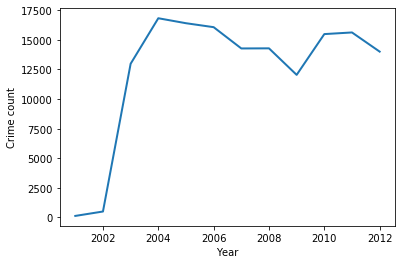

In [27]:
import matplotlib.pyplot as plt
plt.plot(crime_by_year['Year'], crime_by_year['Crime_count'], linewidth = 2)
plt.xlabel('Year')
plt.ylabel('Crime count')

In general, does it look like crime increases from 2009 - 2011.

Grouping the record of arrests according to each year.

In [28]:
data[data['Arrest'] == True].groupby('Year').count()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,month,day
Year,,,,,,,,,,,
2001,2152,2152,2152,2152,2152,2152,2152,3,36,2152,2152
2002,2115,2115,2115,2115,2115,2115,2115,23,1506,2115,2115
2003,1798,1798,1798,1798,1798,1798,1798,1415,1798,1798,1798
2004,1693,1693,1693,1693,1693,1693,1693,1691,1693,1693,1693
2005,1528,1528,1528,1528,1528,1528,1528,1523,1528,1528,1528
2006,1302,1302,1302,1302,1302,1302,1302,1301,1302,1302,1302
2007,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212
2008,1020,1020,1020,1020,1020,1020,1020,1013,1020,1020,1020
2009,840,840,840,840,840,840,840,833,839,840,840




Making a list of arrest made each year and putting into a dataframe

In [29]:
arrest_by_year = pd.DataFrame({'Year':[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012], 
                               'Arrest_count': [3, 23, 1415, 1691, 1523, 1301, 1212, 1013, 832, 700, 625, 547]})

In [30]:
arrest_by_year.head()

,Year,Arrest_count
0,2001,3
1,2002,23
2,2003,1415
3,2004,1691
4,2005,1523


First half record of arrests(2001 - 2006)

In [31]:
arrest_by_year.iloc[0:6]

,Year,Arrest_count
0,2001,3
1,2002,23
2,2003,1415
3,2004,1691
4,2005,1523
5,2006,1301


Second half record of arrest (2007 - 2012)

In [32]:
arrest_by_year.iloc[6:12]

,Year,Arrest_count
6,2007,1212
7,2008,1013
8,2009,832
9,2010,700
10,2011,625
11,2012,547


In [33]:
print(arrest_by_year.iloc[0:6].sum())
print(arrest_by_year.iloc[6:12].sum())

Year            12021
Arrest_count     5956
dtype: int64
Year            12057
Arrest_count     4929
dtype: int64


Text(0, 0.5, 'Arrest count')

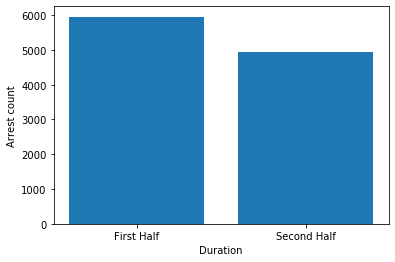

In [34]:
year = ['First Half', 'Second Half']
arrest = [5956, 4929]
plt.bar(year, arrest)
plt.xlabel('Duration')
plt.ylabel('Arrest count')

Crimes for which more arrests were made are in the first half of the time period or the second half of the time period?
Answer: First half

Making two dataframes, one counting no. of arrest, others no arrest for the year 2001

In [35]:
count_arrest_2001 = data[(data['Arrest'] == True) & (data['Year'] == 2001)]

In [36]:
no_arrest_2001 = data[(data['Arrest'] == False) & (data['Year'] == 2001)]

In [37]:
count_arrest_2001

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,day
191630,191630,1310022,2001-01-01 01:50:00,STREET,True,False,2233,NaN,NaN,2001,1,Monday
191628,191628,1310725,2001-01-01 03:00:00,STREET,True,False,822,NaN,NaN,2001,1,Monday
191607,191607,1312461,2001-01-01 16:00:00,STREET,True,False,1413,NaN,NaN,2001,1,Monday
191601,191601,1311051,2001-01-01 18:00:00,STREET,True,False,132,NaN,NaN,2001,1,Monday
191600,191600,1311345,2001-01-01 18:30:00,STREET,True,False,323,NaN,NaN,2001,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
171008,171008,1924678,2001-12-31 08:00:00,STREET,True,False,323,NaN,NaN,2001,12,Monday
170995,170995,1917204,2001-12-31 17:30:00,STREET,True,False,1433,NaN,NaN,2001,12,Monday
170992,170992,1931084,2001-12-31 18:00:00,STREET,True,False,1434,NaN,NaN,2001,12,Monday
170987,170987,1938514,2001-12-31 19:30:00,OTHER,True,False,813,NaN,NaN,2001,12,Monday


In [38]:
count_arrest_2001.count()

Unnamed: 0             2152
ID                     2152
Date                   2152
LocationDescription    2152
Arrest                 2152
Domestic               2152
Beat                   2152
District                  3
CommunityArea            36
Year                   2152
month                  2152
day                    2152
dtype: int64

In [39]:
no_arrest_2001.count()

Unnamed: 0             18517
ID                     18517
Date                   18517
LocationDescription    18517
Arrest                 18517
Domestic               18517
Beat                   18517
District                 119
CommunityArea            550
Year                   18517
month                  18517
day                    18517
dtype: int64

In [40]:
3/121

0.024793388429752067

****Answer not matching****
approx. 0.02

Making two dataframes, one counting no. of arrest, others no arrest for the year 2007

In [41]:
count_arrest_2007 = data[(data['Arrest'] == True) & (data['Year'] == 2007)]

In [42]:
no_arrest_2007 = data[(data['Arrest'] == False) & (data['Year'] == 2007)]

In [43]:
count_arrest_2007.count()


Unnamed: 0             1212
ID                     1212
Date                   1212
LocationDescription    1212
Arrest                 1212
Domestic               1212
Beat                   1212
District               1212
CommunityArea          1212
Year                   1212
month                  1212
day                    1212
dtype: int64

In [44]:
no_arrest_2007.count()

Unnamed: 0             13068
ID                     13068
Date                   13068
LocationDescription    13068
Arrest                 13068
Domestic               13068
Beat                   13068
District               13059
CommunityArea          13068
Year                   13068
month                  13068
day                    13068
dtype: int64

In [45]:
1212/(1212 + 13059)

0.08492747529955855

Proportion = 0.08

In [46]:
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,day
191640,191640,1310463,2001-01-01 00:01:00,STREET,False,False,1911,NaN,NaN,2001,1,Monday
191637,191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,1,Monday
191639,191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,1,Monday
191638,191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,1,Monday
191634,191634,1918610,2001-01-01 00:05:00,RESIDENCE-GARAGE,False,False,2514,NaN,NaN,2001,1,Monday


Making a dataframe to show no. of records by each location

In [47]:
location_wise_crime = data.groupby('LocationDescription')['ID'].count()

In [48]:
location_wise_crime.sort_values(ascending = False).head(10)

LocationDescription
STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
RESIDENTIAL YARD (FRONT/BACK)       1536
RESIDENCE                           1302
RESIDENCE-GARAGE                    1176
VACANT LOT/LAND                      985
Name: ID, dtype: int64

Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category?
1. Street
2. PARKING LOT/GARAGE(NON.RESID.)
3. ALLEY 
4. GAS STATION
5. DRIVEWAY - RESIDENTIAL 

Taking head 7 because two locations they've not considered i.e "Other" and "RESIDENTIAL YARD (FRONT/BACK)".  Sp Top(7) - Top(2) = Top(5)!

In [49]:
Top5 = location_wise_crime.sort_values(ascending = False).head(7).sum()

In [50]:
print(Top5)

183619


 But we are excluding "Others"(= 3270) and "RESIDENTIAL YARD (FRONT/BACK)"(1507). So, subtract those two from 139424

In [51]:
139424 - 3270 - 1507

134647

Create a subset of your data, only taking observations for which the theft happened in one of these five locations, and call this new data set "Top5". How many observations are in Top5?
Answer = 134647

In [52]:
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,day
191640,191640,1310463,2001-01-01 00:01:00,STREET,False,False,1911,NaN,NaN,2001,1,Monday
191637,191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,1,Monday
191639,191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,1,Monday
191638,191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,1,Monday
191634,191634,1918610,2001-01-01 00:05:00,RESIDENCE-GARAGE,False,False,2514,NaN,NaN,2001,1,Monday


Creating a dataframe where the location is 'Gas station' and finding no. if thefts for each day of the week

In [53]:
data[data['LocationDescription'] == 'GAS STATION'].groupby('day').count()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month
day,,,,,,,,,,,
Friday,316,316,316,316,316,316,316,239,267,316,316
Monday,287,287,287,287,287,287,287,207,240,287,287
Saturday,345,345,345,345,345,345,345,269,303,345,345
Sunday,318,318,318,318,318,318,318,231,269,318,318
Thursday,282,282,282,282,282,282,282,216,249,282,282
Tuesday,269,269,269,269,269,269,269,200,236,269,269
Wednesday,294,294,294,294,294,294,294,222,252,294,294


On which day of the week do the most motor vehicle thefts at gas stations happen?
Answer: Saturday